In [31]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import pickle

sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

In [2]:
M.__version__

'0.1.5'

In [3]:
Exp = pd.read_excel('Villiger2007.xlsx')
Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']

## Run these, else use loaded pickles as we do here for speed

In [4]:
use_pickles=True

In [5]:
if use_pickles is False:
        bulk = {'SiO2_Liq': Exp['SiO2_Liq'].loc[0], 
                'TiO2_Liq': Exp['TiO2_Liq'].loc[0], 
                'Al2O3_Liq': Exp['Al2O3_Liq'].loc[0], 
                'FeOt_Liq': Exp['FeOt_Liq'].loc[0], 
                'MnO_Liq': Exp['MnO_Liq'].loc[0], 
                'MgO_Liq': Exp['MgO_Liq'].loc[0], 
                'CaO_Liq': Exp['CaO_Liq'].loc[0], 
                'Na2O_Liq': Exp['Na2O_Liq'].loc[0], 
                'K2O_Liq': Exp['K2O_Liq'].loc[0],
                'Cr2O3_Liq': 0.01,
                'P2O5_Liq': 0.0,
                'H2O_Liq': 0.2, 
                'CO2_Liq': 0.0,
        'Fe3Fet_Liq': 0.0}

        Exp[Elements] = 100*Exp[Elements].values/np.nansum(Exp[Elements], axis = 1).reshape(8,1)

        P_bar = np.array([1000,4000,7000,10000])

        Results_Holland = M.multi_path(Model = "Holland", comp = bulk,
                        T_end_C = 1075, dt_C = 2, 
                        P_bar = P_bar, find_liquidus = True,
                        H2O_Liq = 0.2, Frac_solid = True,
                                timeout = 600, Fe3Fet_Liq = 0.064)

        Results_MELTSv120 = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
                        T_end_C = 1000, dt_C = 2, 
                        P_bar = P_bar, find_liquidus = True,
                        H2O_Liq = 0.2,
                        Frac_solid = True, Frac_fluid = True,
                        fO2_buffer = "FMQ", fO2_offset = -2,
                                timeout = 600)

        Results_MELTSv102 = M.multi_path(Model = "MELTSv1.0.2", comp = bulk,
                        T_end_C = 1000, dt_C = 2, 
                        P_bar = P_bar, find_liquidus = True,
                        H2O_Liq = 0.2,
                        Frac_solid = True, Frac_fluid = True,
                        fO2_buffer = "FMQ", fO2_offset = -2,
                                timeout = 300)

        Results_pMELTS = M.multi_path(Model = "pMELTS", comp = bulk,
                        T_end_C = 1000, dt_C = 2, 
                        P_bar = P_bar, find_liquidus = True,
                        H2O_Liq = 0.2,
                        Frac_solid = True, Frac_fluid = True,
                        fO2_buffer = "FMQ", fO2_offset = -2,
                                timeout = 600)
        
        
        with open('Villiger_Results_Holland.pck', 'wb') as file_handle:
                pickle.dump(Results_Holland, file_handle)
        
        with open('Villiger_Results_pMELTS.pck', 'wb') as file_handle:
                pickle.dump(Results_pMELTS, file_handle)
        
        with open('Villiger_Results_MELTSv102.pck', 'wb') as file_handle:
                pickle.dump(Results_MELTSv102, file_handle)
        
        with open('Villiger_Results_MELTSv120.pck', 'wb') as file_handle:
                pickle.dump(Results_MELTSv120, file_handle)
        


In [6]:
with open('Villiger_Results_Holland.pck', 'rb') as file_handle:
    Results_Holland = pickle.load(file_handle)
    
with open('Villiger_Results_pMELTS.pck', 'rb') as file_handle:
    Results_pMELTS = pickle.load(file_handle)

with open('Villiger_Results_MELTSv102.pck', 'rb') as file_handle:
    Results_MELTSv102 = pickle.load(file_handle)

with open('Villiger_Results_MELTSv120.pck', 'rb') as file_handle:
    Results_MELTSv120 = pickle.load(file_handle)

In [11]:
pet10=pd.read_excel('Villiger_Petrolog_10kbar.xlsx', sheet_name='Petrolog_Output_FRAC')
pet7=pd.read_excel('Villiger_Petrolog_7kbar.xlsx', sheet_name='Petrolog_Output_FRAC')
pet4=pd.read_excel('Villiger_Petrolog_4kbar.xlsx', sheet_name='Petrolog_Output_FRAC')
pet1=pd.read_excel('Villiger_Petrolog_1kbar.xlsx', sheet_name='Petrolog_Output_FRAC')

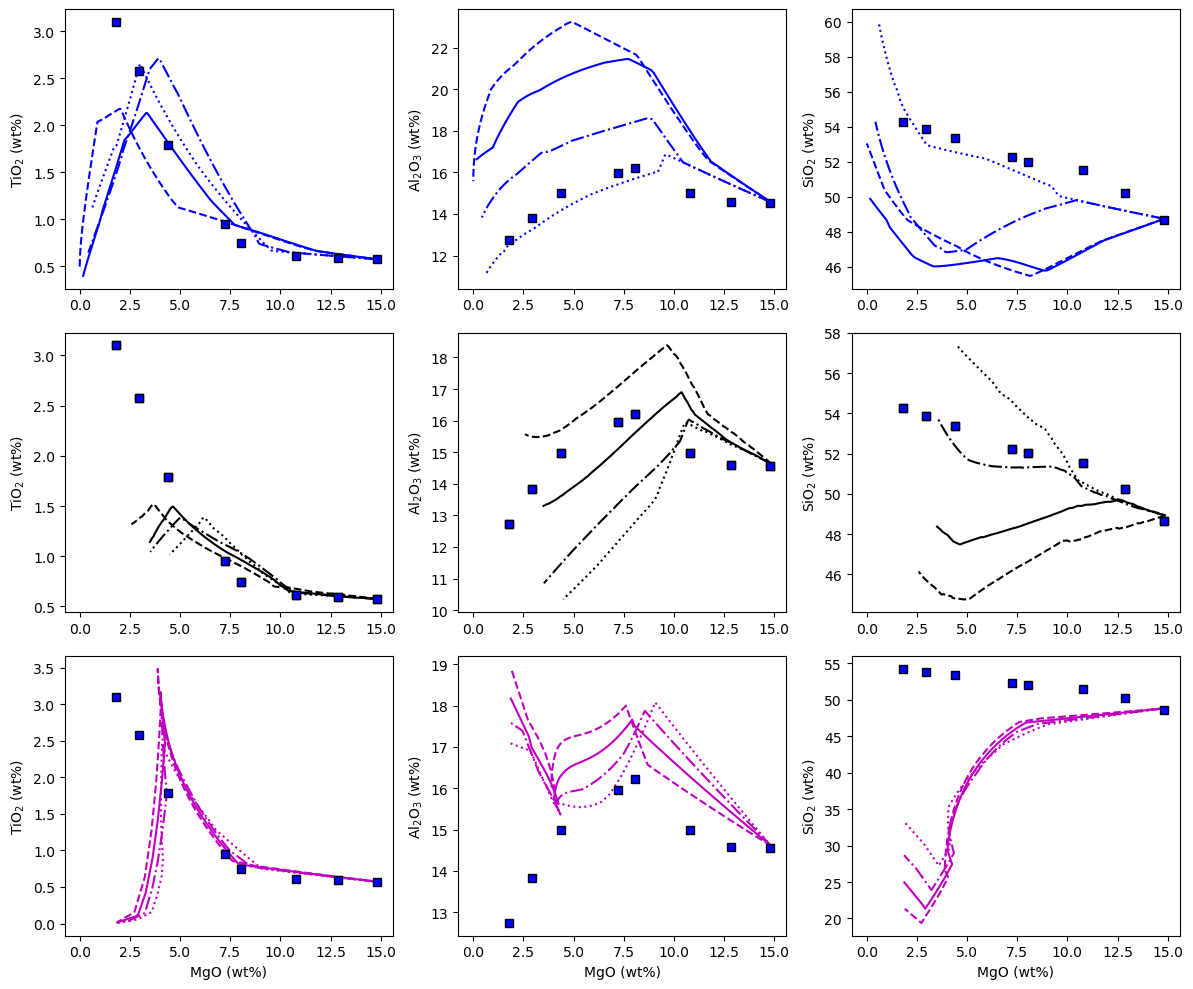

In [44]:
f, a = plt.subplots(3,3, figsize = (12,10), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']
for index in Results_MELTSv120:
    Results_pMELTS[index]['All'][Elements] = 100*Results_pMELTS[index]['All'][Elements].values/np.nansum(Results_pMELTS[index]['All'][Elements], axis = 1).reshape(len(Results_pMELTS[index]['All']['SiO2_Liq']),1)
    Results_MELTSv102[index]['All'][Elements] = 100*Results_MELTSv102[index]['All'][Elements].values/np.nansum(Results_MELTSv102[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv102[index]['All']['SiO2_Liq']),1)
    Results_MELTSv120[index]['All'][Elements] = 100*Results_MELTSv120[index]['All'][Elements].values/np.nansum(Results_MELTSv120[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv120[index]['All']['SiO2_Liq']),1)

Elements = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO',
            'CaO', 'Na2O', 'K2O']
for index in Results_Holland:
    Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2']),1)
    
y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']
y3=['TiO$_2$ (wt%)', 'Al$_2$O$_3$ (wt%)', 'SiO$_2$ (wt%)']
y2 = [' TiO2_melt', 'Al2O3_melt', ' SiO2_melt']

Elements = [' SiO2_melt', ' TiO2_melt', 'Al2O3_melt', 'Fe2O3_melt', '  FeO_melt', '  MnO_melt', '  MgO_melt', '  CaO_melt', ' Na2O_melt', '  K2O_melt']

pet10[Elements] = 100*pet10[Elements].values/np.nansum(pet10[Elements], axis = 1).reshape(len(pet10[' SiO2_melt']),1)
pet7[Elements] = 100*pet7[Elements].values/np.nansum(pet7[Elements], axis = 1).reshape(len(pet7[' SiO2_melt']),1)
pet4[Elements] = 100*pet4[Elements].values/np.nansum(pet4[Elements], axis = 1).reshape(len(pet4[' SiO2_melt']),1)
pet1[Elements] = 100*pet1[Elements].values/np.nansum(pet1[Elements], axis = 1).reshape(len(pet1[' SiO2_melt']),1)


lines = [':', '-', '--', '-.']    

for i in range(3):    
    a[0][i].plot(Results_MELTSv102['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 0']['liquid1'][y[i]], ':', color = 'b')
    a[0][i].plot(Results_MELTSv102['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 1']['liquid1'][y[i]], '-.', color = 'b')
    a[0][i].plot(Results_MELTSv102['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 2']['liquid1'][y[i]], '-', color = 'b')
    a[0][i].plot(Results_MELTSv102['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 3']['liquid1'][y[i]], '--', color = 'b')
    




    a[2][i].plot(pet1['  MgO_melt'],
                 pet1[y2[i]], ':', color = 'm')
    a[2][i].plot(pet4['  MgO_melt'],
                 pet4[y2[i]], '-.', color = 'm')
    a[2][i].plot(pet7['  MgO_melt'],
                 pet7[y2[i]], '-', color = 'm')
    a[2][i].plot(pet10['  MgO_melt'],
                 pet10[y2[i]], '--', color = 'm')
    
    

    
 


    a[1][i].plot(Results_Holland['index = 0']['liq']['MgO'],
                Results_Holland['index = 0']['liq'][y[i][:-4]], ':', color = 'k')
    a[1][i].plot(Results_Holland['index = 1']['liq']['MgO'],
                Results_Holland['index = 1']['liq'][y[i][:-4]], '-.', color = 'k')
    a[1][i].plot(Results_Holland['index = 2']['liq']['MgO'],
                Results_Holland['index = 2']['liq'][y[i][:-4]], '-', color = 'k')
    a[1][i].plot(Results_Holland['index = 3']['liq']['MgO'],
                Results_Holland['index = 3']['liq'][y[i][:-4]], '--', color = 'k')    
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    a[2][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    
    a[0][i].set_ylabel(y3[i])
    a[1][i].set_ylabel(y3[i])
    a[2][i].set_ylabel(y3[i])
    
    a[2][i].set_xlabel('MgO (wt%)')
    a[1][i].xaxis.set_tick_params(which='both', labelbottom=True)
    a[0][i].xaxis.set_tick_params(which='both', labelbottom=True)


f.tight_layout()
f.savefig('Bymodel.png', dpi=300)

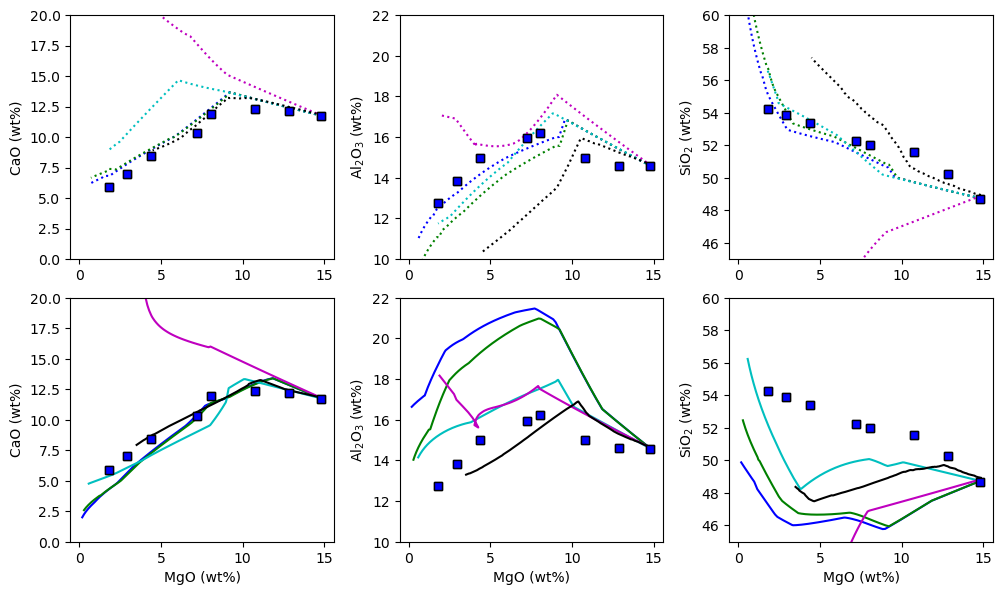

In [68]:
f, a = plt.subplots(2,3, figsize = (10,6), sharex = True)

y = ['CaO_Liq', 'Al2O3_Liq', 'SiO2_Liq']

Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']
for index in Results_MELTSv120:
    Results_pMELTS[index]['All'][Elements] = 100*Results_pMELTS[index]['All'][Elements].values/np.nansum(Results_pMELTS[index]['All'][Elements], axis = 1).reshape(len(Results_pMELTS[index]['All']['SiO2_Liq']),1)
    Results_MELTSv102[index]['All'][Elements] = 100*Results_MELTSv102[index]['All'][Elements].values/np.nansum(Results_MELTSv102[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv102[index]['All']['SiO2_Liq']),1)
    Results_MELTSv120[index]['All'][Elements] = 100*Results_MELTSv120[index]['All'][Elements].values/np.nansum(Results_MELTSv120[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv120[index]['All']['SiO2_Liq']),1)

Elements = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO',
            'CaO', 'Na2O', 'K2O']
for index in Results_Holland:
    Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2']),1)
    
y = ['CaO_Liq', 'Al2O3_Liq', 'SiO2_Liq']
y3=['CaO (wt%)', 'Al$_2$O$_3$ (wt%)', 'SiO$_2$ (wt%)']
y2 = ['  CaO_melt', 'Al2O3_melt', ' SiO2_melt']

Elements = [' SiO2_melt', ' TiO2_melt', 'Al2O3_melt', 'Fe2O3_melt', '  FeO_melt', '  MnO_melt', '  MgO_melt', '  CaO_melt', ' Na2O_melt', '  K2O_melt']

pet10[Elements] = 100*pet10[Elements].values/np.nansum(pet10[Elements], axis = 1).reshape(len(pet10[' SiO2_melt']),1)
pet7[Elements] = 100*pet7[Elements].values/np.nansum(pet7[Elements], axis = 1).reshape(len(pet7[' SiO2_melt']),1)
pet4[Elements] = 100*pet4[Elements].values/np.nansum(pet4[Elements], axis = 1).reshape(len(pet4[' SiO2_melt']),1)
pet1[Elements] = 100*pet1[Elements].values/np.nansum(pet1[Elements], axis = 1).reshape(len(pet1[' SiO2_melt']),1)


lines = [':', '-', '--', '-.']    

for i in range(3):    
    a[0][i].plot(Results_MELTSv102['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 0']['liquid1'][y[i]], ':', color = 'b')
    # a[1][i].plot(Results_MELTSv102['index = 1']['liquid1']['MgO_Liq'],
    #             Results_MELTSv102['index = 1']['liquid1'][y[i]], '-.', color = 'b')
    a[1][i].plot(Results_MELTSv102['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 2']['liquid1'][y[i]], '-', color = 'b')
    # a[3][i].plot(Results_MELTSv102['index = 3']['liquid1']['MgO_Liq'],
    #             Results_MELTSv102['index = 3']['liquid1'][y[i]], '--', color = 'b')
    
    alpha2=1
    a[0][i].plot(Results_MELTSv120['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 0']['liquid1'][y[i]], ':', color = 'g', alpha=alpha2)
    # a[1][i].plot(Results_MELTSv120['index = 1']['liquid1']['MgO_Liq'],
    #             Results_MELTSv120['index = 1']['liquid1'][y[i]], '-.', color = 'g', alpha=alpha2)
    a[1][i].plot(Results_MELTSv120['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 2']['liquid1'][y[i]], '-', color = 'g', alpha=alpha2)
    # a[3][i].plot(Results_MELTSv120['index = 3']['liquid1']['MgO_Liq'],
    #             Results_MELTSv120['index = 3']['liquid1'][y[i]], '--', color = 'g', alpha=alpha2)
    
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')

    a[0][i].plot(Results_pMELTS['index = 0']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 0']['liquid1'][y[i]], ':', color = 'c')
    # a[1][i].plot(Results_pMELTS['index = 1']['liquid1']['MgO_Liq'],
    #             Results_pMELTS['index = 1']['liquid1'][y[i]], '-.', color = 'c')
    a[1][i].plot(Results_pMELTS['index = 2']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 2']['liquid1'][y[i]], '-', color = 'c')
    # a[3][i].plot(Results_pMELTS['index = 3']['liquid1']['MgO_Liq'],
    #             Results_pMELTS['index = 3']['liquid1'][y[i]], '--', color = 'c')
    



    a[0][i].plot(pet1['  MgO_melt'],
                 pet1[y2[i]], ':', color = 'm')
    a[1][i].plot(pet7['  MgO_melt'],
                 pet7[y2[i]], '-', color = 'm')

    
    

    
 


    a[0][i].plot(Results_Holland['index = 0']['liq']['MgO'],
                Results_Holland['index = 0']['liq'][y[i][:-4]], ':', color = 'k')
    # a[1][i].plot(Results_Holland['index = 1']['liq']['MgO'],
    #             Results_Holland['index = 1']['liq'][y[i][:-4]], '-.', color = 'k')
    a[1][i].plot(Results_Holland['index = 2']['liq']['MgO'],
                Results_Holland['index = 2']['liq'][y[i][:-4]], '-', color = 'k')
    # a[3][i].plot(Results_Holland['index = 3']['liq']['MgO'],
    #             Results_Holland['index = 3']['liq'][y[i][:-4]], '--', color = 'k')
        
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')

    
    a[0][i].set_ylabel(y3[i])
    a[1][i].set_ylabel(y3[i])

    
    a[1][i].set_xlabel('MgO (wt%)')
    a[1][i].xaxis.set_tick_params(which='both', labelbottom=True)
    a[0][i].xaxis.set_tick_params(which='both', labelbottom=True)
    #a[2][i].xaxis.set_tick_params(which='both', labelbottom=True)

    #a[i][i].xaxis.set_tick_params(which='both', labelbottom=True)
f.tight_layout()
a[0][0].set_ylim([0, 20])
a[1][0].set_ylim([0, 20])
a[0][2].set_ylim([45, 60])
a[1][2].set_ylim([45, 60])
a[0][1].set_ylim([10, 22])
a[1][1].set_ylim([10, 22])
f.savefig('Sorted by pressure_villiger_twoP.png', dpi=300)

## Do by pressure instead

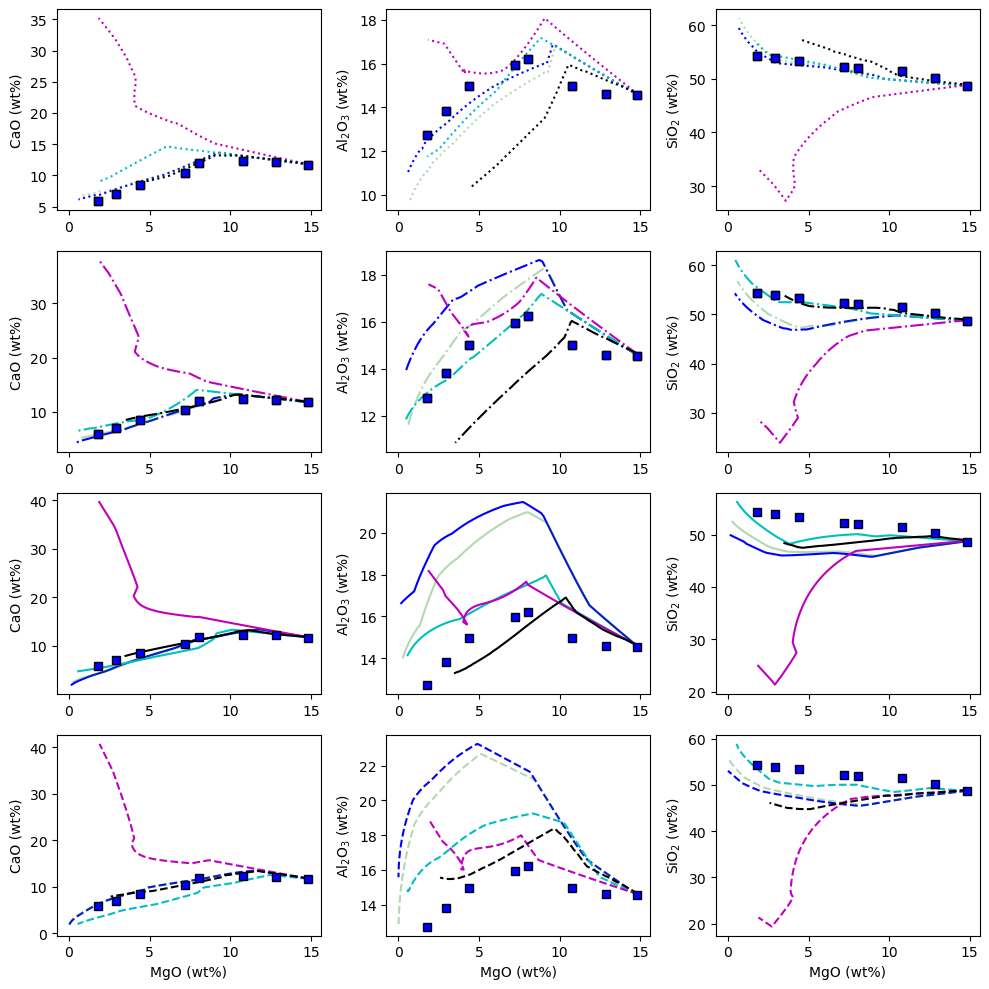

In [47]:
f, a = plt.subplots(4,3, figsize = (10,10), sharex = True)

y = ['CaO_Liq', 'Al2O3_Liq', 'SiO2_Liq']

Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']
for index in Results_MELTSv120:
    Results_pMELTS[index]['All'][Elements] = 100*Results_pMELTS[index]['All'][Elements].values/np.nansum(Results_pMELTS[index]['All'][Elements], axis = 1).reshape(len(Results_pMELTS[index]['All']['SiO2_Liq']),1)
    Results_MELTSv102[index]['All'][Elements] = 100*Results_MELTSv102[index]['All'][Elements].values/np.nansum(Results_MELTSv102[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv102[index]['All']['SiO2_Liq']),1)
    Results_MELTSv120[index]['All'][Elements] = 100*Results_MELTSv120[index]['All'][Elements].values/np.nansum(Results_MELTSv120[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv120[index]['All']['SiO2_Liq']),1)

Elements = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO',
            'CaO', 'Na2O', 'K2O']
for index in Results_Holland:
    Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2']),1)
    
y = ['CaO_Liq', 'Al2O3_Liq', 'SiO2_Liq']
y3=['CaO (wt%)', 'Al$_2$O$_3$ (wt%)', 'SiO$_2$ (wt%)']
y2 = ['  CaO_melt', 'Al2O3_melt', ' SiO2_melt']

Elements = [' SiO2_melt', ' TiO2_melt', 'Al2O3_melt', 'Fe2O3_melt', '  FeO_melt', '  MnO_melt', '  MgO_melt', '  CaO_melt', ' Na2O_melt', '  K2O_melt']

pet10[Elements] = 100*pet10[Elements].values/np.nansum(pet10[Elements], axis = 1).reshape(len(pet10[' SiO2_melt']),1)
pet7[Elements] = 100*pet7[Elements].values/np.nansum(pet7[Elements], axis = 1).reshape(len(pet7[' SiO2_melt']),1)
pet4[Elements] = 100*pet4[Elements].values/np.nansum(pet4[Elements], axis = 1).reshape(len(pet4[' SiO2_melt']),1)
pet1[Elements] = 100*pet1[Elements].values/np.nansum(pet1[Elements], axis = 1).reshape(len(pet1[' SiO2_melt']),1)


lines = [':', '-', '--', '-.']    

for i in range(3):    
    a[0][i].plot(Results_MELTSv102['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 0']['liquid1'][y[i]], ':', color = 'b')
    a[1][i].plot(Results_MELTSv102['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 1']['liquid1'][y[i]], '-.', color = 'b')
    a[2][i].plot(Results_MELTSv102['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 2']['liquid1'][y[i]], '-', color = 'b')
    a[3][i].plot(Results_MELTSv102['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 3']['liquid1'][y[i]], '--', color = 'b')
    
    a[0][i].plot(Results_MELTSv120['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 0']['liquid1'][y[i]], ':', color = 'g', alpha=alpha2)
    a[1][i].plot(Results_MELTSv120['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 1']['liquid1'][y[i]], '-.', color = 'g', alpha=alpha2)
    a[2][i].plot(Results_MELTSv120['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 2']['liquid1'][y[i]], '-', color = 'g', alpha=alpha2)
    a[3][i].plot(Results_MELTSv120['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 3']['liquid1'][y[i]], '--', color = 'g', alpha=alpha2)
    
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')

    a[0][i].plot(Results_pMELTS['index = 0']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 0']['liquid1'][y[i]], ':', color = 'c')
    a[1][i].plot(Results_pMELTS['index = 1']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 1']['liquid1'][y[i]], '-.', color = 'c')
    a[2][i].plot(Results_pMELTS['index = 2']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 2']['liquid1'][y[i]], '-', color = 'c')
    a[3][i].plot(Results_pMELTS['index = 3']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 3']['liquid1'][y[i]], '--', color = 'c')
    



    a[0][i].plot(pet1['  MgO_melt'],
                 pet1[y2[i]], ':', color = 'm')
    a[1][i].plot(pet4['  MgO_melt'],
                 pet4[y2[i]], '-.', color = 'm')
    a[2][i].plot(pet7['  MgO_melt'],
                 pet7[y2[i]], '-', color = 'm')
    a[3][i].plot(pet10['  MgO_melt'],
                 pet10[y2[i]], '--', color = 'm')
    
    

    
 


    a[0][i].plot(Results_Holland['index = 0']['liq']['MgO'],
                Results_Holland['index = 0']['liq'][y[i][:-4]], ':', color = 'k')
    a[1][i].plot(Results_Holland['index = 1']['liq']['MgO'],
                Results_Holland['index = 1']['liq'][y[i][:-4]], '-.', color = 'k')
    a[2][i].plot(Results_Holland['index = 2']['liq']['MgO'],
                Results_Holland['index = 2']['liq'][y[i][:-4]], '-', color = 'k')
    a[3][i].plot(Results_Holland['index = 3']['liq']['MgO'],
                Results_Holland['index = 3']['liq'][y[i][:-4]], '--', color = 'k')
        
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    a[2][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    a[3][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    
    a[0][i].set_ylabel(y3[i])
    a[1][i].set_ylabel(y3[i])
    a[2][i].set_ylabel(y3[i])
    a[3][i].set_ylabel(y3[i])
    
    a[3][i].set_xlabel('MgO (wt%)')
    a[1][i].xaxis.set_tick_params(which='both', labelbottom=True)
    a[0][i].xaxis.set_tick_params(which='both', labelbottom=True)
    a[2][i].xaxis.set_tick_params(which='both', labelbottom=True)

    a[i][i].xaxis.set_tick_params(which='both', labelbottom=True)
f.tight_layout()
f.savefig('Sorted by pressure_villiger.png', dpi=300)

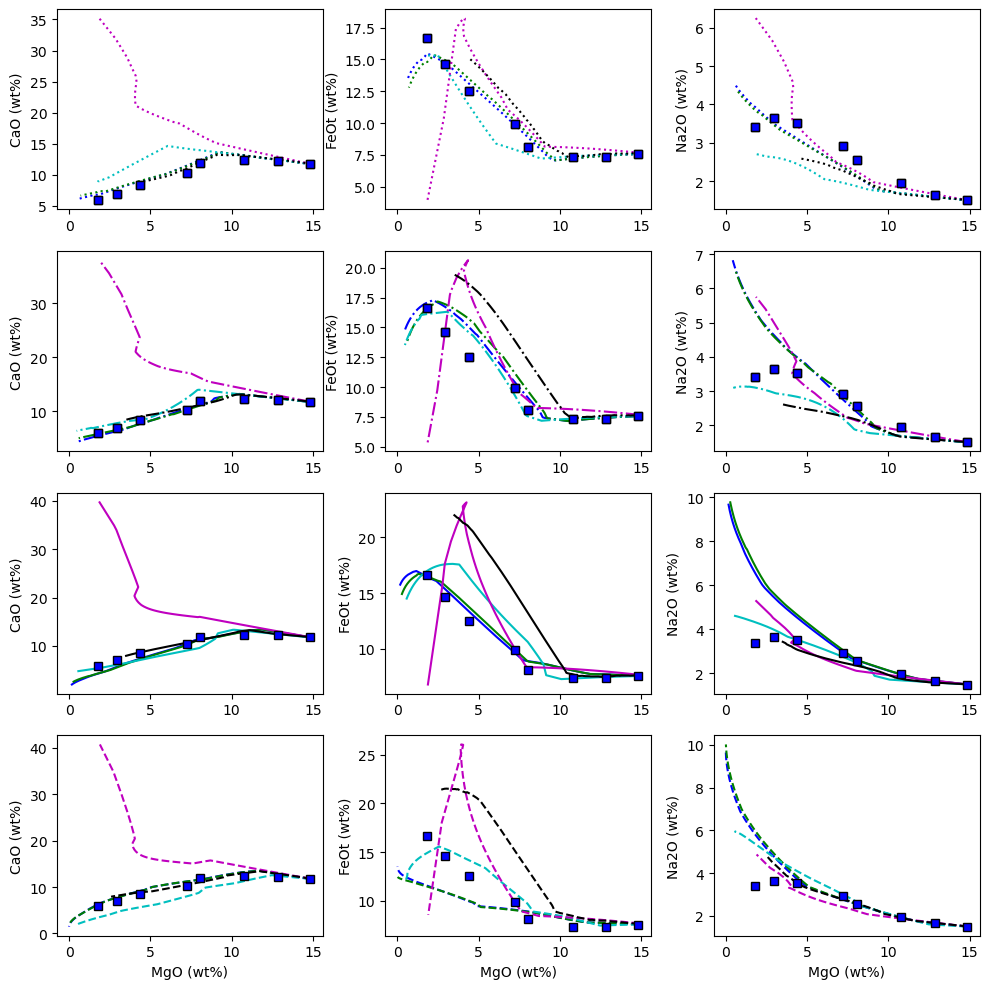

In [41]:
f, a = plt.subplots(4,3, figsize = (10,10), sharex = True)

y = ['CaO_Liq', 'FeOt_Liq', 'Na2O_Liq']

Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']
for index in Results_MELTSv120:
    Results_pMELTS[index]['All'][Elements] = 100*Results_pMELTS[index]['All'][Elements].values/np.nansum(Results_pMELTS[index]['All'][Elements], axis = 1).reshape(len(Results_pMELTS[index]['All']['SiO2_Liq']),1)
    Results_MELTSv102[index]['All'][Elements] = 100*Results_MELTSv102[index]['All'][Elements].values/np.nansum(Results_MELTSv102[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv102[index]['All']['SiO2_Liq']),1)
    Results_MELTSv120[index]['All'][Elements] = 100*Results_MELTSv120[index]['All'][Elements].values/np.nansum(Results_MELTSv120[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv120[index]['All']['SiO2_Liq']),1)

Elements = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO',
            'CaO', 'Na2O', 'K2O']
for index in Results_Holland:
    Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2']),1)
    

y3=['CaO (wt%)', 'FeOt (wt%)', 'Na2O (wt%)']
y2 = ['  CaO_melt', 'FeOt_melt', ' Na2O_melt']

Elements = [' SiO2_melt', ' TiO2_melt', 'Al2O3_melt', 'Fe2O3_melt', '  FeO_melt', '  MnO_melt', '  MgO_melt', '  CaO_melt', ' Na2O_melt', '  K2O_melt']

pet10[Elements] = 100*pet10[Elements].values/np.nansum(pet10[Elements], axis = 1).reshape(len(pet10[' SiO2_melt']),1)
pet7[Elements] = 100*pet7[Elements].values/np.nansum(pet7[Elements], axis = 1).reshape(len(pet7[' SiO2_melt']),1)
pet4[Elements] = 100*pet4[Elements].values/np.nansum(pet4[Elements], axis = 1).reshape(len(pet4[' SiO2_melt']),1)
pet1[Elements] = 100*pet1[Elements].values/np.nansum(pet1[Elements], axis = 1).reshape(len(pet1[' SiO2_melt']),1)
pet10['FeOt_melt']=pet10['  FeO_melt']+pet10['Fe2O3_melt']*1.1111
pet7['FeOt_melt']=pet7['  FeO_melt']+pet7['Fe2O3_melt']*1.1111
pet4['FeOt_melt']=pet4['  FeO_melt']+pet4['Fe2O3_melt']*1.1111
pet1['FeOt_melt']=pet1['  FeO_melt']+pet1['Fe2O3_melt']*1.1111
lines = [':', '-', '--', '-.']    

y4= ['CaO', 'FeO', 'Na2O']
for i in range(3):    
    a[0][i].plot(Results_MELTSv102['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 0']['liquid1'][y[i]], ':', color = 'b')
    a[1][i].plot(Results_MELTSv102['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 1']['liquid1'][y[i]], '-.', color = 'b')
    a[2][i].plot(Results_MELTSv102['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 2']['liquid1'][y[i]], '-', color = 'b')
    a[3][i].plot(Results_MELTSv102['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 3']['liquid1'][y[i]], '--', color = 'b')
    
    a[0][i].plot(Results_MELTSv120['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 0']['liquid1'][y[i]], ':', color = 'g', alpha=alpha2)
    a[1][i].plot(Results_MELTSv120['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 1']['liquid1'][y[i]], '-.', color = 'g', alpha=alpha2)
    a[2][i].plot(Results_MELTSv120['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 2']['liquid1'][y[i]], '-', color = 'g', alpha=alpha2)
    a[3][i].plot(Results_MELTSv120['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 3']['liquid1'][y[i]], '--', color = 'g', alpha=alpha2)
    
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')

    a[0][i].plot(Results_pMELTS['index = 0']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 0']['liquid1'][y[i]], ':', color = 'c')
    a[1][i].plot(Results_pMELTS['index = 1']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 1']['liquid1'][y[i]], '-.', color = 'c')
    a[2][i].plot(Results_pMELTS['index = 2']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 2']['liquid1'][y[i]], '-', color = 'c')
    a[3][i].plot(Results_pMELTS['index = 3']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 3']['liquid1'][y[i]], '--', color = 'c')
    



    a[0][i].plot(pet1['  MgO_melt'],
                 pet1[y2[i]], ':', color = 'm')
    a[1][i].plot(pet4['  MgO_melt'],
                 pet4[y2[i]], '-.', color = 'm')
    a[2][i].plot(pet7['  MgO_melt'],
                 pet7[y2[i]], '-', color = 'm')
    a[3][i].plot(pet10['  MgO_melt'],
                 pet10[y2[i]], '--', color = 'm')
    
    

    
 


    a[0][i].plot(Results_Holland['index = 0']['liq']['MgO'],
                Results_Holland['index = 0']['liq'][y4[i]], ':', color = 'k')
    a[1][i].plot(Results_Holland['index = 1']['liq']['MgO'],
                Results_Holland['index = 1']['liq'][y4[i]], '-.', color = 'k')
    a[2][i].plot(Results_Holland['index = 2']['liq']['MgO'],
                Results_Holland['index = 2']['liq'][y4[i]], '-', color = 'k')
    a[3][i].plot(Results_Holland['index = 3']['liq']['MgO'],
                Results_Holland['index = 3']['liq'][y4[i]], '--', color = 'k')
        
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    a[2][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    a[3][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')
    
    a[0][i].set_ylabel(y3[i])
    a[1][i].set_ylabel(y3[i])
    a[2][i].set_ylabel(y3[i])
    a[3][i].set_ylabel(y3[i])
    
    a[3][i].set_xlabel('MgO (wt%)')
    a[1][i].xaxis.set_tick_params(which='both', labelbottom=True)
    a[0][i].xaxis.set_tick_params(which='both', labelbottom=True)
    a[2][i].xaxis.set_tick_params(which='both', labelbottom=True)
f.tight_layout()
f.savefig('Sorted by pressure_villiger_CaFeNa.png', dpi=300)

In [38]:
Results_Holland['index = 0']['liq']

,SiO2,Al2O3,CaO,MgO,FeO,K2O,Na2O,TiO2,O,Cr2O3,H2O
0,48.930055,14.628855,11.801297,14.865926,7.612001,0.080439,1.508233,0.573193,0.000537,0.000100,0.002007
1,48.952074,14.648367,11.819310,14.808453,7.606680,0.080339,1.510269,0.574509,0.000541,0.000099,0.002012
2,48.962523,14.668862,11.843651,14.737796,7.618845,0.080370,1.512398,0.575556,0.000541,0.000101,0.002014
3,48.977378,14.693037,11.865127,14.668333,7.624599,0.080369,1.514671,0.576487,0.000541,0.000095,0.002014
4,49.001214,14.716958,11.886399,14.599611,7.620658,0.080204,1.517633,0.577322,0.000541,0.000101,0.002013
...,...,...,...,...,...,...,...,...,...,...,...
147,56.975379,10.565976,9.083536,4.842485,14.601609,0.271422,2.570558,1.089035,0.001114,0.000097,0.005704
148,57.073153,10.509503,9.037659,4.750732,14.704601,0.274544,2.578244,1.071565,0.001115,0.000097,0.005776
149,57.173300,10.452426,8.992647,4.659825,14.806441,0.277483,2.584666,1.053213,0.001114,0.000097,0.005855
150,57.284289,10.393284,8.939749,4.570283,14.907549,0.279981,2.591558,1.033307,0.001112,0.000097,0.005929


## Each MELTS gets own panels


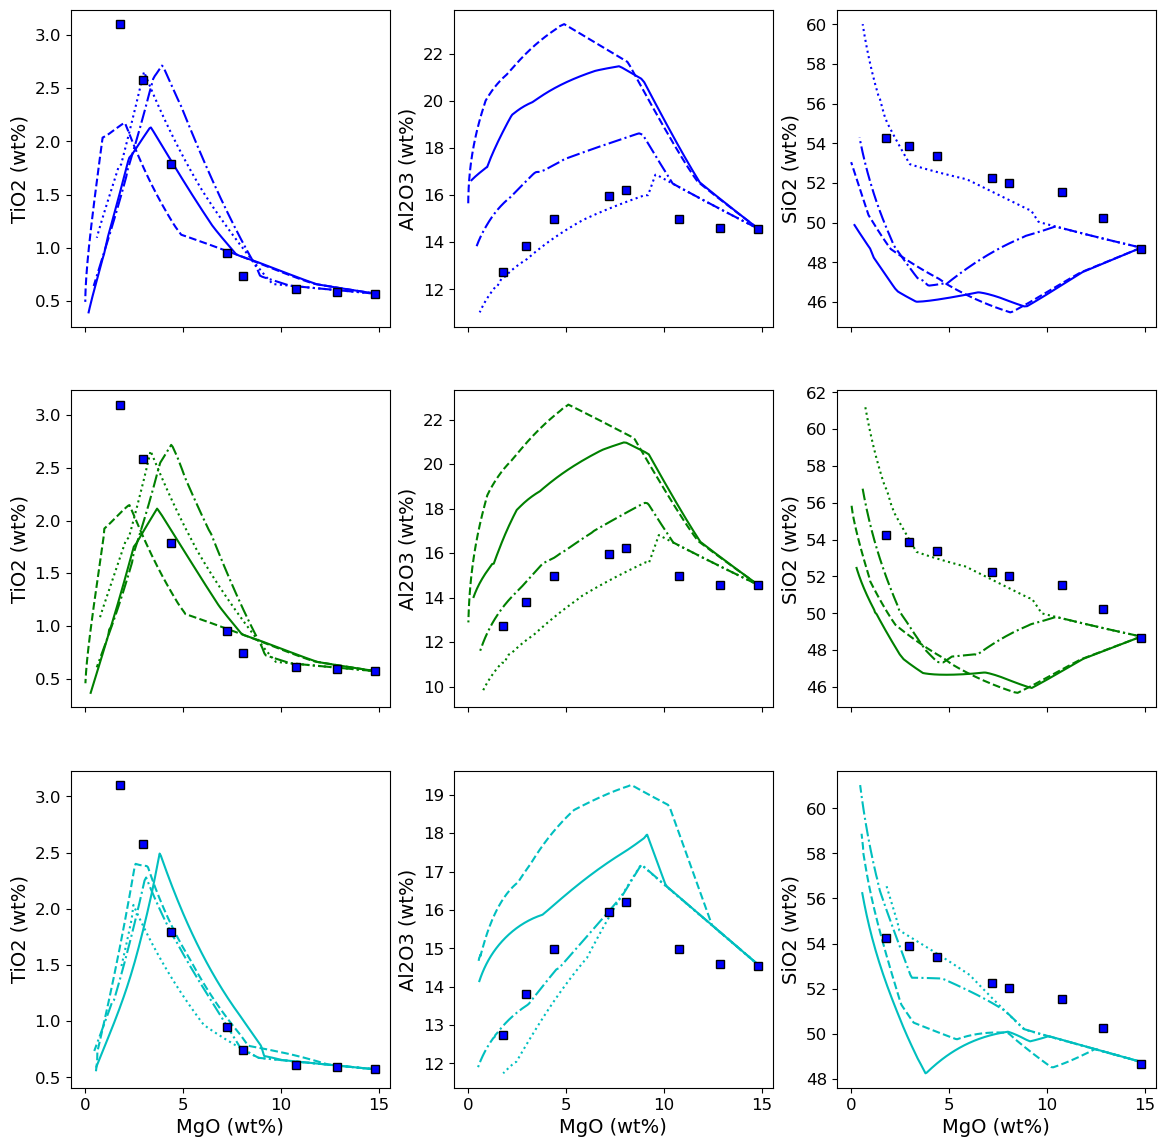

In [7]:
f, a = plt.subplots(3,3, figsize = (14,14), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']
for index in Results_MELTSv120:
    Results_pMELTS[index]['All'][Elements] = 100*Results_pMELTS[index]['All'][Elements].values/np.nansum(Results_pMELTS[index]['All'][Elements], axis = 1).reshape(len(Results_pMELTS[index]['All']['SiO2_Liq']),1)
    Results_MELTSv102[index]['All'][Elements] = 100*Results_MELTSv102[index]['All'][Elements].values/np.nansum(Results_MELTSv102[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv102[index]['All']['SiO2_Liq']),1)
    Results_MELTSv120[index]['All'][Elements] = 100*Results_MELTSv120[index]['All'][Elements].values/np.nansum(Results_MELTSv120[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv120[index]['All']['SiO2_Liq']),1)

Elements = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO',
            'CaO', 'Na2O', 'K2O']
for index in Results_Holland:
    Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2']),1)
    

lines = [':', '-', '--', '-.']    

for i in range(3):    
    a[0][i].plot(Results_MELTSv102['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 0']['liquid1'][y[i]], ':', color = 'b')
    a[0][i].plot(Results_MELTSv102['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 1']['liquid1'][y[i]], '-.', color = 'b')
    a[0][i].plot(Results_MELTSv102['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 2']['liquid1'][y[i]], '-', color = 'b')
    a[0][i].plot(Results_MELTSv102['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 3']['liquid1'][y[i]], '--', color = 'b')
    
    alpha2=1
    a[1][i].plot(Results_MELTSv120['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 0']['liquid1'][y[i]], ':', color = 'g', alpha=alpha2)
    a[1][i].plot(Results_MELTSv120['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 1']['liquid1'][y[i]], '-.', color = 'g', alpha=alpha2)
    a[1][i].plot(Results_MELTSv120['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 2']['liquid1'][y[i]], '-', color = 'g', alpha=alpha2)
    a[1][i].plot(Results_MELTSv120['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 3']['liquid1'][y[i]], '--', color = 'g', alpha=alpha2)
    
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')

    a[2][i].plot(Results_pMELTS['index = 0']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 0']['liquid1'][y[i]], ':', color = 'c')
    a[2][i].plot(Results_pMELTS['index = 1']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 1']['liquid1'][y[i]], '-.', color = 'c')
    a[2][i].plot(Results_pMELTS['index = 2']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 2']['liquid1'][y[i]], '-', color = 'c')
    a[2][i].plot(Results_pMELTS['index = 3']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 3']['liquid1'][y[i]], '--', color = 'c')
    
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')

    a[2][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[2][i].set_ylabel(y[i][:-4] + ' (wt%)')

    
    a[2][i].set_xlabel('MgO (wt%)')
    
#plt.savefig("Villiger.eps", dpi = 300, bbox_inches='tight')  

## Supporting information  - different MELTS versions grouped by melts

## Grouped by Pressure

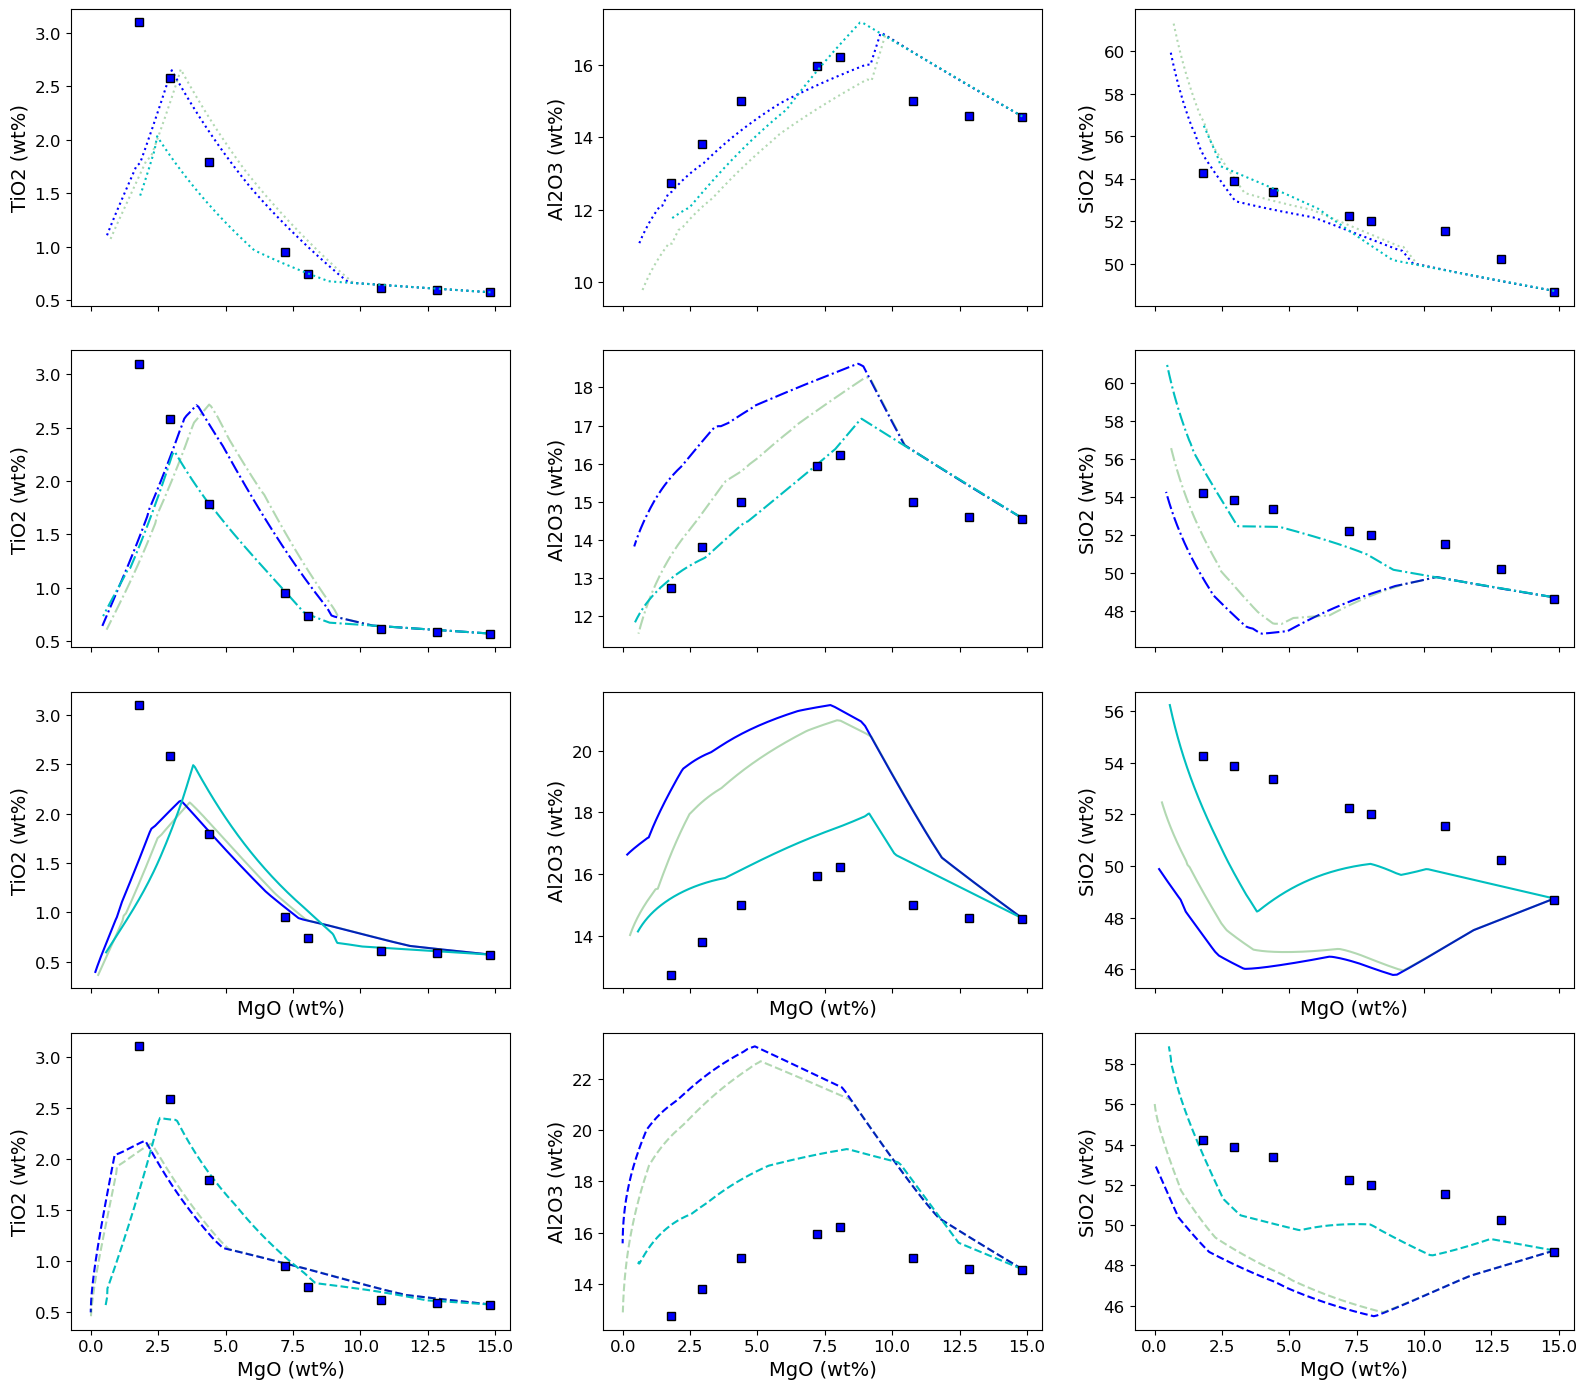

In [16]:
f, a = plt.subplots(4,3, figsize = (16,14), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']
for index in Results_MELTSv120:
    Results_pMELTS[index]['All'][Elements] = 100*Results_pMELTS[index]['All'][Elements].values/np.nansum(Results_pMELTS[index]['All'][Elements], axis = 1).reshape(len(Results_pMELTS[index]['All']['SiO2_Liq']),1)
    Results_MELTSv102[index]['All'][Elements] = 100*Results_MELTSv102[index]['All'][Elements].values/np.nansum(Results_MELTSv102[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv102[index]['All']['SiO2_Liq']),1)
    Results_MELTSv120[index]['All'][Elements] = 100*Results_MELTSv120[index]['All'][Elements].values/np.nansum(Results_MELTSv120[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv120[index]['All']['SiO2_Liq']),1)

Elements = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO',
            'CaO', 'Na2O', 'K2O']
for index in Results_Holland:
    Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2']),1)
    

lines = [':', '-', '--', '-.']    

for i in range(3):    
    a[0][i].plot(Results_MELTSv102['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 0']['liquid1'][y[i]], ':', color = 'b')
    a[1][i].plot(Results_MELTSv102['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 1']['liquid1'][y[i]], '-.', color = 'b')
    a[2][i].plot(Results_MELTSv102['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 2']['liquid1'][y[i]], '-', color = 'b')
    a[3][i].plot(Results_MELTSv102['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 3']['liquid1'][y[i]], '--', color = 'b')
    
    alpha2=0.3
    a[0][i].plot(Results_MELTSv120['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 0']['liquid1'][y[i]], ':', color = 'g', alpha=alpha2)
    a[1][i].plot(Results_MELTSv120['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 1']['liquid1'][y[i]], '-.', color = 'g', alpha=alpha2)
    a[2][i].plot(Results_MELTSv120['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 2']['liquid1'][y[i]], '-', color = 'g', alpha=alpha2)
    a[3][i].plot(Results_MELTSv120['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 3']['liquid1'][y[i]], '--', color = 'g', alpha=alpha2)
    
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')

    a[0][i].plot(Results_pMELTS['index = 0']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 0']['liquid1'][y[i]], ':', color = 'c')
    a[1][i].plot(Results_pMELTS['index = 1']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 1']['liquid1'][y[i]], '-.', color = 'c')
    a[2][i].plot(Results_pMELTS['index = 2']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 2']['liquid1'][y[i]], '-', color = 'c')
    a[3][i].plot(Results_pMELTS['index = 3']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 3']['liquid1'][y[i]], '--', color = 'c')
    
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[2][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[3][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    

    a[2][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[2][i].set_xlabel('MgO (wt%)')

    a[3][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[3][i].set_xlabel('MgO (wt%)')

f.tight_layout()
    
plt.savefig('Villiger_allMELTS.png', dpi = 300, bbox_inches='tight')  

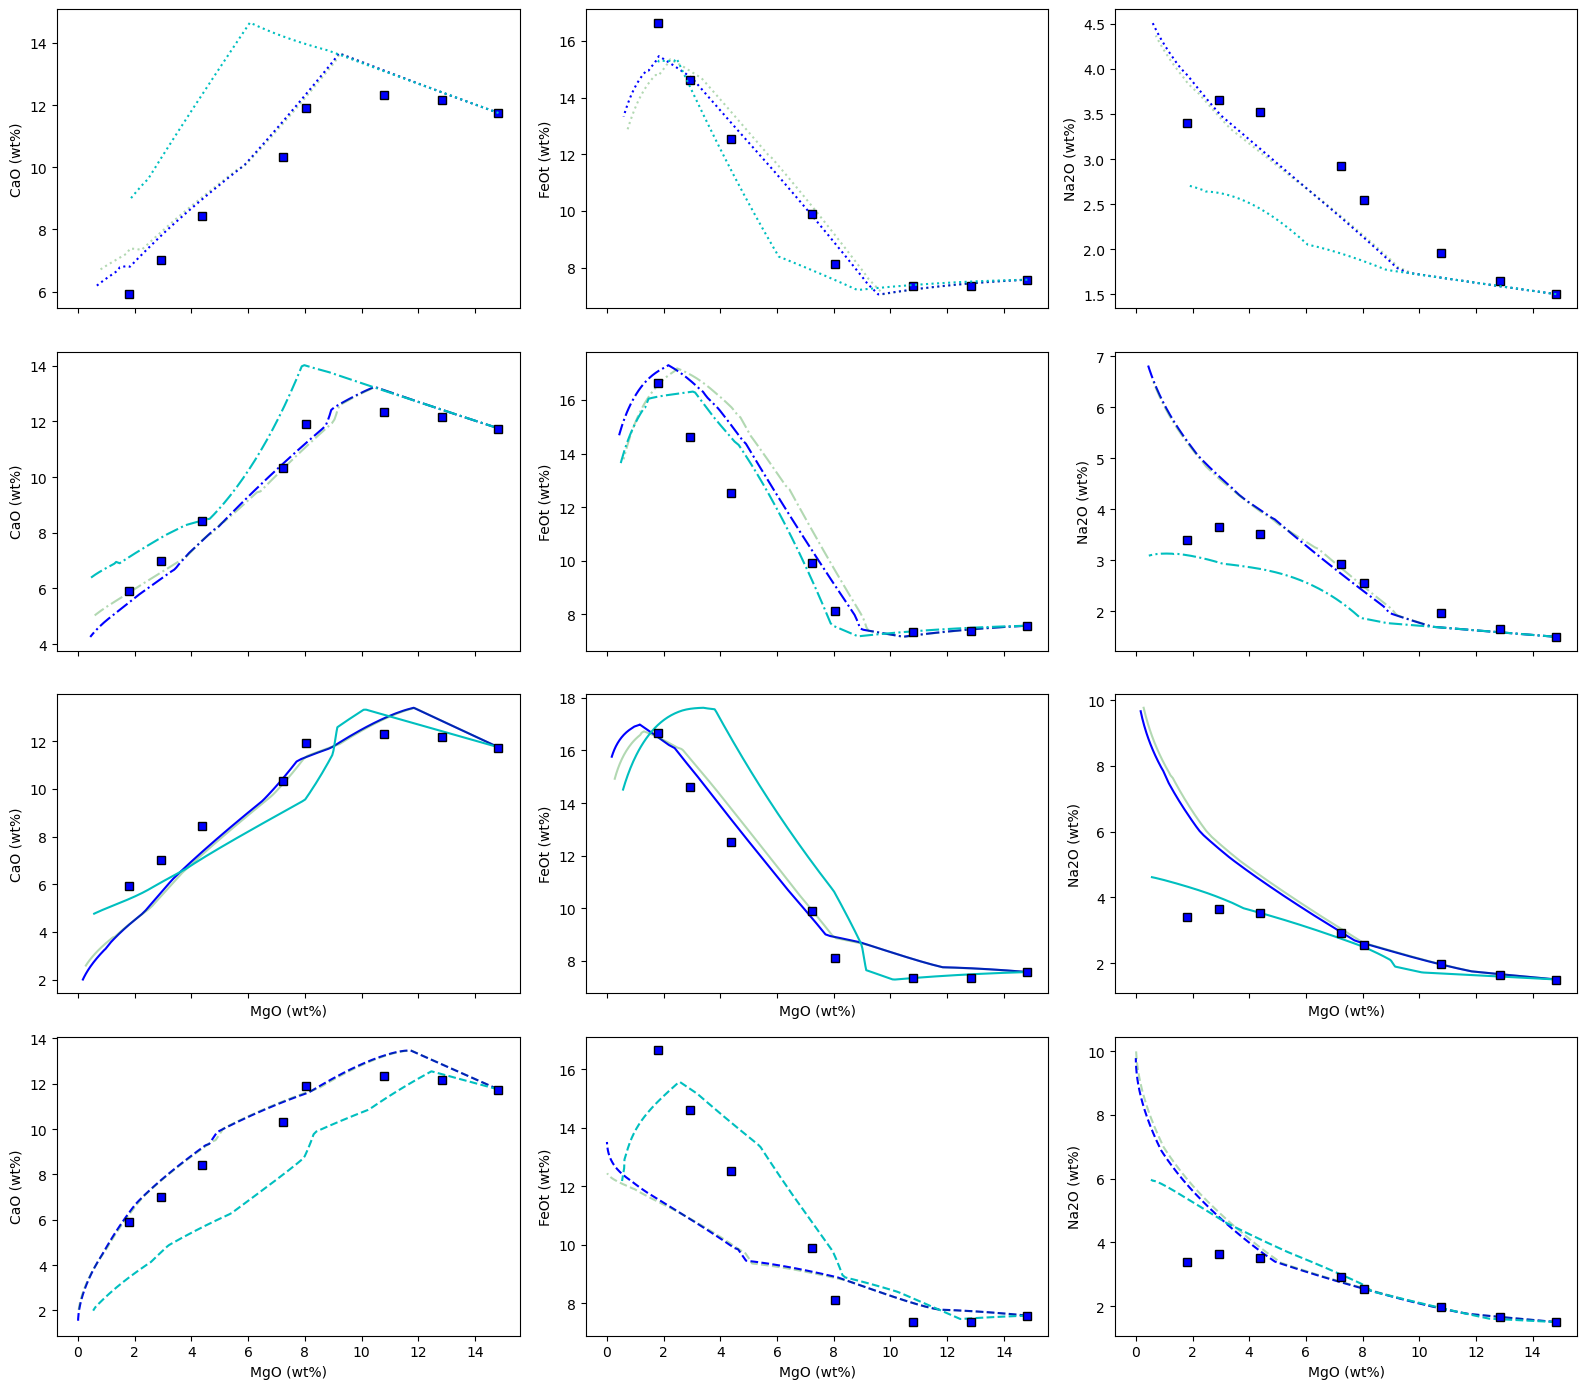

In [45]:
f, a = plt.subplots(4,3, figsize = (16,14), sharex = True)

y = ['CaO_Liq', 'FeOt_Liq', 'Na2O_Liq']

Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']
for index in Results_MELTSv120:
    Results_pMELTS[index]['All'][Elements] = 100*Results_pMELTS[index]['All'][Elements].values/np.nansum(Results_pMELTS[index]['All'][Elements], axis = 1).reshape(len(Results_pMELTS[index]['All']['SiO2_Liq']),1)
    Results_MELTSv102[index]['All'][Elements] = 100*Results_MELTSv102[index]['All'][Elements].values/np.nansum(Results_MELTSv102[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv102[index]['All']['SiO2_Liq']),1)
    Results_MELTSv120[index]['All'][Elements] = 100*Results_MELTSv120[index]['All'][Elements].values/np.nansum(Results_MELTSv120[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv120[index]['All']['SiO2_Liq']),1)

Elements = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO',
            'CaO', 'Na2O', 'K2O']
for index in Results_Holland:
    Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2']),1)
    

lines = [':', '-', '--', '-.']    

for i in range(3):    
    a[0][i].plot(Results_MELTSv102['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 0']['liquid1'][y[i]], ':', color = 'b')
    a[1][i].plot(Results_MELTSv102['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 1']['liquid1'][y[i]], '-.', color = 'b')
    a[2][i].plot(Results_MELTSv102['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 2']['liquid1'][y[i]], '-', color = 'b')
    a[3][i].plot(Results_MELTSv102['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 3']['liquid1'][y[i]], '--', color = 'b')
    
    alpha2=0.3
    a[0][i].plot(Results_MELTSv120['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 0']['liquid1'][y[i]], ':', color = 'g', alpha=alpha2)
    a[1][i].plot(Results_MELTSv120['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 1']['liquid1'][y[i]], '-.', color = 'g', alpha=alpha2)
    a[2][i].plot(Results_MELTSv120['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 2']['liquid1'][y[i]], '-', color = 'g', alpha=alpha2)
    a[3][i].plot(Results_MELTSv120['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 3']['liquid1'][y[i]], '--', color = 'g', alpha=alpha2)
    
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')

    a[0][i].plot(Results_pMELTS['index = 0']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 0']['liquid1'][y[i]], ':', color = 'c')
    a[1][i].plot(Results_pMELTS['index = 1']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 1']['liquid1'][y[i]], '-.', color = 'c')
    a[2][i].plot(Results_pMELTS['index = 2']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 2']['liquid1'][y[i]], '-', color = 'c')
    a[3][i].plot(Results_pMELTS['index = 3']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 3']['liquid1'][y[i]], '--', color = 'c')
    
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[2][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[3][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    

    a[2][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[2][i].set_xlabel('MgO (wt%)')

    a[3][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[3][i].set_xlabel('MgO (wt%)')

f.tight_layout()
    
plt.savefig('Villiger_allMELTS_diff elements.png', dpi = 300, bbox_inches='tight')  